In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
# Check missing data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

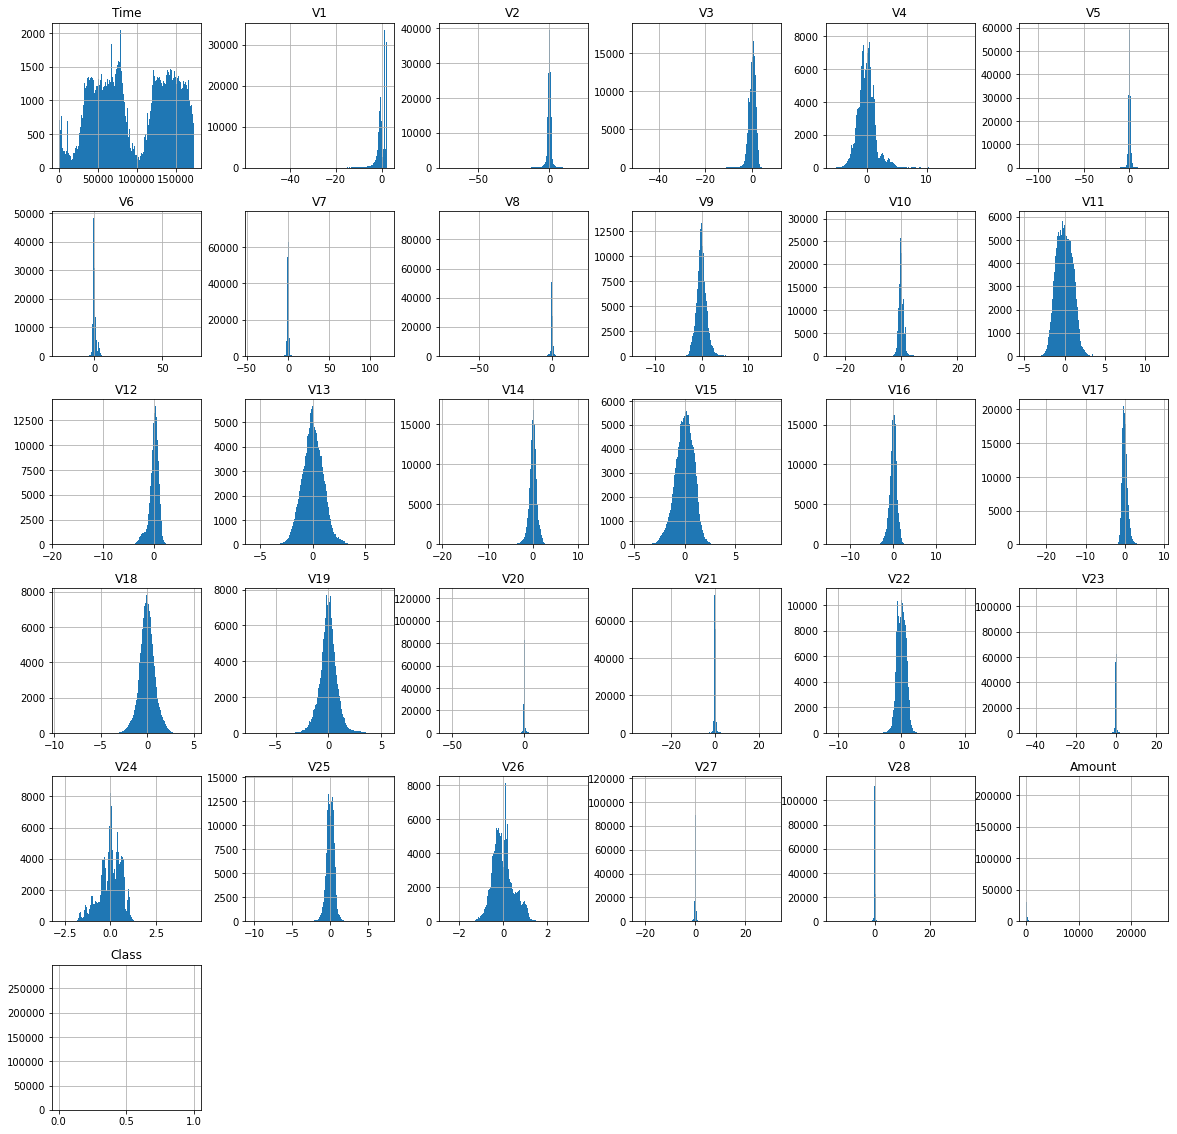

In [9]:
# Check distribution
df.hist(bins=300, figsize=[20,20])
plt.show()

---

# EDA

##### (Check the number of instances of each class)

In [10]:
print('No Frauds: ', df['Class'].value_counts()[0])
print('Frauds: ', df['Class'].value_counts()[1])

No Frauds:  284315
Frauds:  492


In [11]:
print('No Frauds: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds:  99.83 % of the dataset
Frauds:  0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions)')

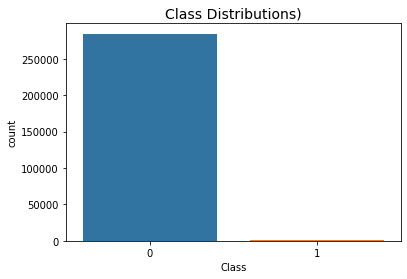

In [12]:
sns.countplot('Class', data=df)
plt.title('Class Distributions)', fontsize=14)

In [13]:
# as expected, the dataset is highly imbalanced, with the "interesting class"
# only accounts for 0.17% of the data

##### (Check missing values)

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### (Check the distributions of the minority class)

In [15]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [16]:
# separate the classes
fraud = df[df['Class']==1]
no_fraud = df[df['Class']==0]

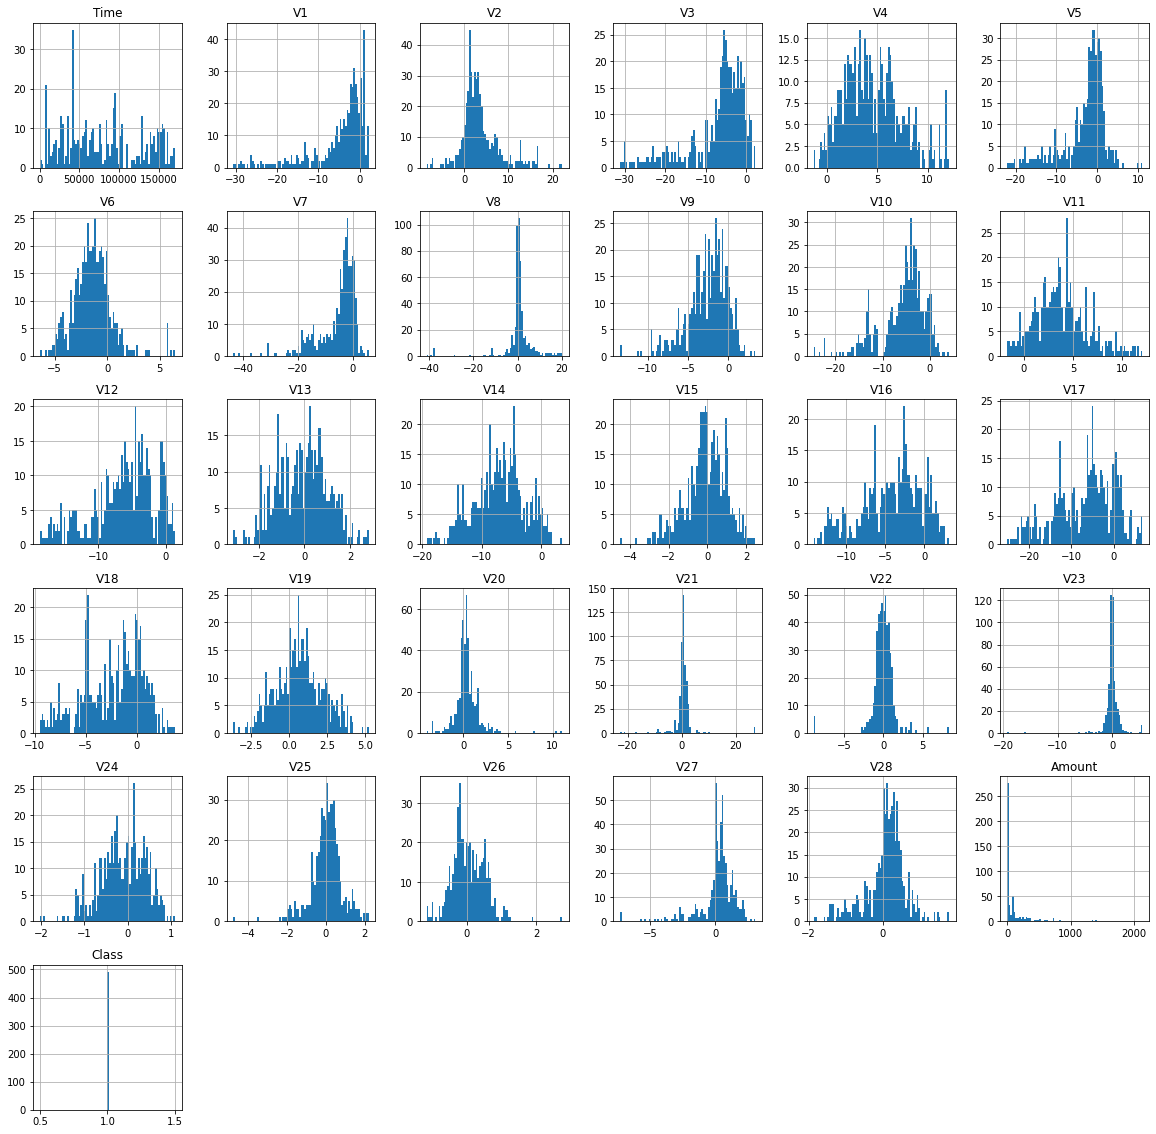

In [17]:
# Check the distribution of fraud instances
fraud.hist(bins=80, figsize=[20,20])
plt.show()

# from the first glance, the numeric values of the PCA components are
# much lower in the fraud instances

##### (Check basic stats of Time and Amount)

In [18]:
# Entire dataset
# Amount
df['Amount'].describe()

# mean: $88
# median: $22
# skewed by extreme values

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
# fraud data
# Amount
fraud['Amount'].describe()

# mean: $122
# median: $9.25

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

##### (Check the distribution of the variables that are not yet scaled - 'Time' and 'Amount' on entire dataset)

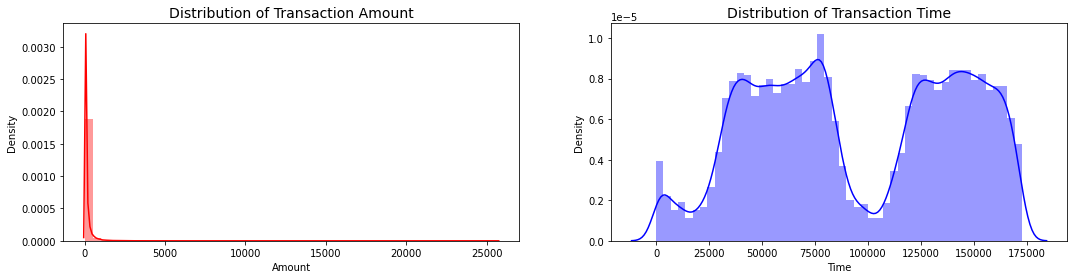

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))


sns.distplot(df['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)



plt.show()

##### (Check the distribution of the variables that are not yet scaled - 'Time' and 'Amount' of the minority class)

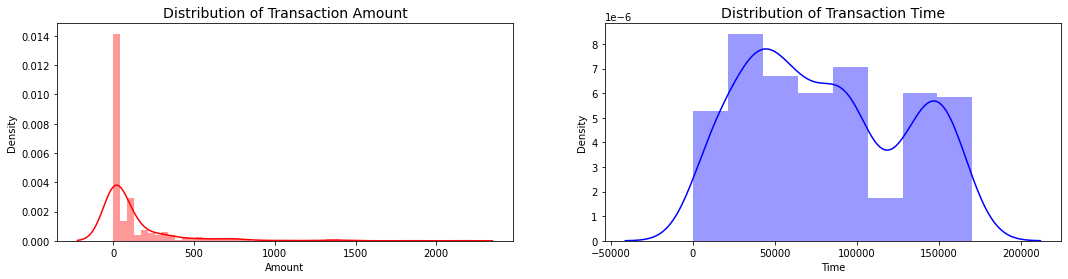

In [21]:
# fraud
fig, ax = plt.subplots(1, 2, figsize=(18,4))


sns.distplot(fraud['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.distplot(fraud['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)



plt.show()

# distribution shape, though different, similar to that of the entire dataset

##### (Check correlations)

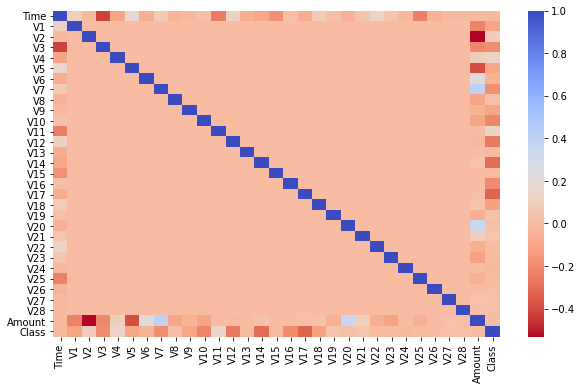

In [22]:
# entire dataset
correlation = df.corr()
plt.figure(figsize=[10,6])
sns.heatmap(correlation, cmap='coolwarm_r')

# very few notable correlations
# positive correlations: V2 and Amount; V2 and Time
# correlation with the fraud class: V17, V14, V12, V10, V7, V3

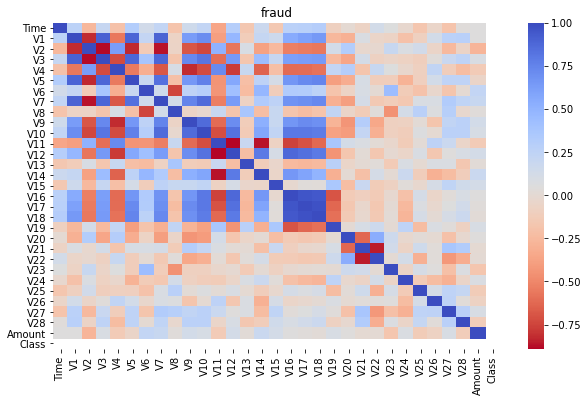

In [25]:
# fraud data
correlation = fraud.corr()
plt.figure(figsize=[10,6])
plt.title('fraud')
sns.heatmap(correlation, cmap='coolwarm_r')

# significant difference from the original dataset
# the first 18 variables tend to have strong positive/negative correlations
# the last 10 variables tend to have weak correlations
# none of the variables have strong correlation with Time or Amount

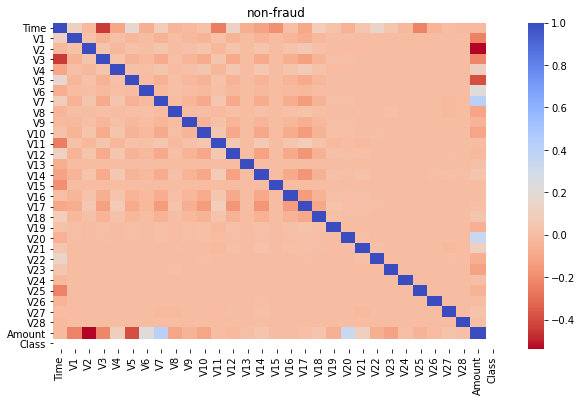

In [26]:
# non-fraud data
correlation = no_fraud.corr()
plt.figure(figsize=[10,6])
plt.title('non-fraud')
sns.heatmap(correlation, cmap='coolwarm_r')

---

# Preprocessing

##### Variable scaling

In [53]:
# the 28 variables have already been scaled
# Time and Amount variables have not been scaled yet

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df['scaled_Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [55]:
# reorder
scaled_amount = df['scaled_Amount']
scaled_time = df['scaled_Time']

df.drop(['scaled_Amount', 'scaled_Time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [59]:
df.to_csv('df_scaled.csv', index=False)